## Analysis of spatial factors

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import umap
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import scipy.io
import matplotlib as mpl

import warnings
warnings.filterwarnings("ignore")

from matplotlib.lines import Line2D

### Load results

In [2]:
res_path = "Results/INSPIRE_registration_merfish"
adata = sc.read_h5ad(res_path + "/adata_inspire.h5ad")
basis_df = pd.read_csv(res_path + "/basis_df_inspire.csv", index_col=0)

### Visualize proportions of spatial factors in cells on UMAP coordinates

In [3]:
basis_df_reorder = np.zeros(basis_df.shape)

# mature OD
basis_df_reorder[0, :] = basis_df.values[0, :]
adata.obs["factor-0"] = adata.obs["Proportion of spatial factor 1"]

# immature OD
basis_df_reorder[1, :] = basis_df.values[6, :]
adata.obs["factor-1"] = adata.obs["Proportion of spatial factor 7"]

# astrocyte
basis_df_reorder[2, :] = basis_df.values[8, :]
adata.obs["factor-2"] = adata.obs["Proportion of spatial factor 9"]

# microglia
basis_df_reorder[3, :] = basis_df.values[11, :]
adata.obs["factor-3"] = adata.obs["Proportion of spatial factor 12"]

# ependymal
basis_df_reorder[4, :] = basis_df.values[10, :]
adata.obs["factor-4"] = adata.obs["Proportion of spatial factor 11"]

# endothelial
basis_df_reorder[5, :] = basis_df.values[3, :]
adata.obs["factor-5"] = adata.obs["Proportion of spatial factor 4"]

# inhibitory
basis_df_reorder[6, :] = basis_df.values[4, :]
adata.obs["factor-6"] = adata.obs["Proportion of spatial factor 5"]
basis_df_reorder[7, :] = basis_df.values[5, :]
adata.obs["factor-7"] = adata.obs["Proportion of spatial factor 6"]
basis_df_reorder[8, :] = basis_df.values[14, :]
adata.obs["factor-8"] = adata.obs["Proportion of spatial factor 15"]
basis_df_reorder[9, :] = basis_df.values[1, :]
adata.obs["factor-9"] = adata.obs["Proportion of spatial factor 2"]
basis_df_reorder[10, :] = basis_df.values[12, :]
adata.obs["factor-10"] = adata.obs["Proportion of spatial factor 13"]

# excitatory
basis_df_reorder[11, :] = basis_df.values[2, :]
adata.obs["factor-11"] = adata.obs["Proportion of spatial factor 3"]
basis_df_reorder[12, :] = basis_df.values[7, :]
adata.obs["factor-12"] = adata.obs["Proportion of spatial factor 8"]
basis_df_reorder[13, :] = basis_df.values[13, :]
adata.obs["factor-13"] = adata.obs["Proportion of spatial factor 14"]
basis_df_reorder[14, :] = basis_df.values[9, :]
adata.obs["factor-14"] = adata.obs["Proportion of spatial factor 10"]

basis_df_update = pd.DataFrame(basis_df_reorder)
basis_df_update.columns = basis_df.columns

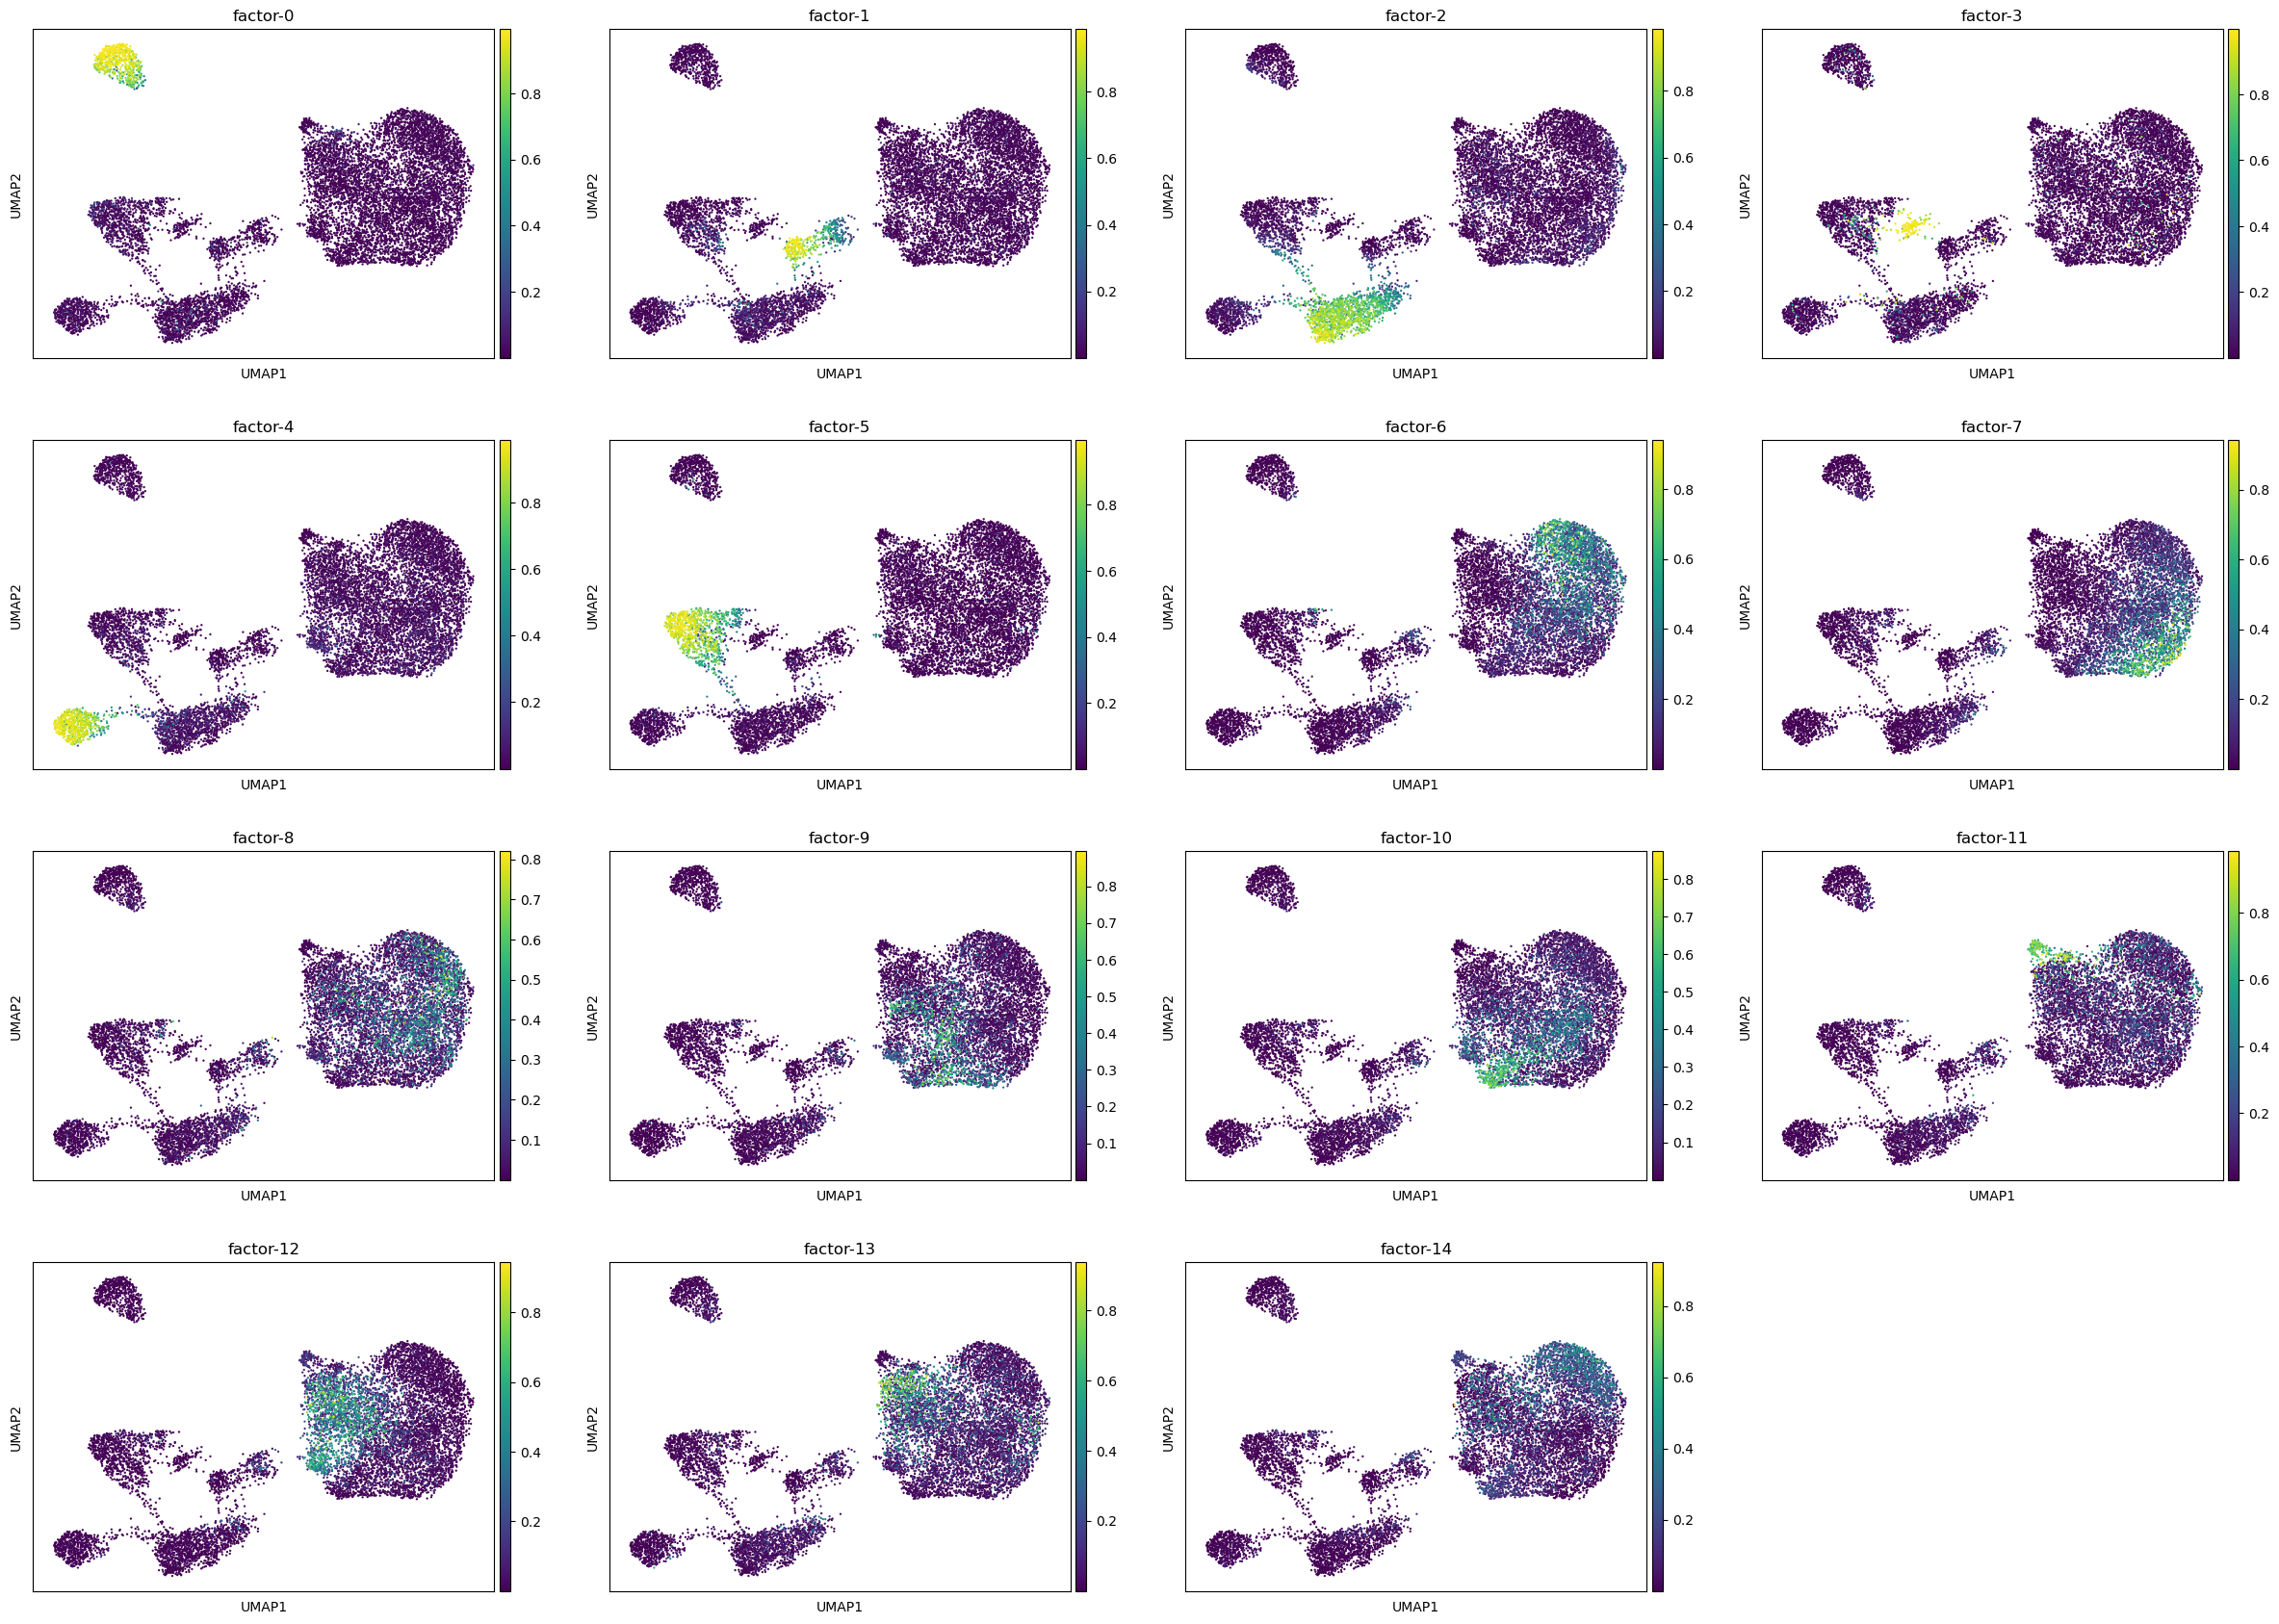

In [4]:
sc.pl.umap(adata, color=["factor-"+str(i) for i in range(15)])

### Correspondence of spatial factors to cell types

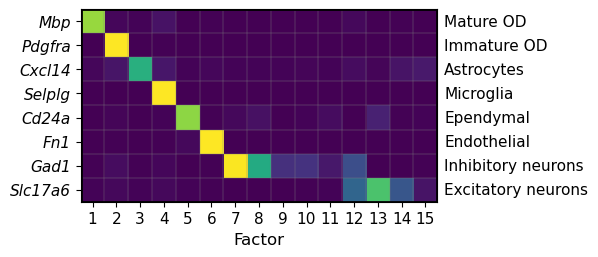

In [5]:
n_factors = 15
gene_set = ['Mbp',
            'Pdgfra',
            'Cxcl14',
            'Selplg',
            'Cd24a',
            'Fn1',
            'Gad1',
            'Slc17a6']
profile = basis_df_update[gene_set]

f = plt.figure(figsize=(4.6,2.5))
ax = f.add_subplot(111)
ax.set_xlabel('Factor', fontsize=12)
im = ax.imshow(profile.T, cmap='viridis', interpolation='nearest', aspect='auto', vmax=0.12, vmin=0.0)
plt.xticks(np.arange(n_factors), np.arange(n_factors)+1, rotation=0, fontsize=11)
plt.yticks(np.arange(len(gene_set)), gene_set, rotation=0, fontsize=11, style="italic")
# plt.title("Gene signature of factors", fontsize=13)
plt.vlines(x=np.arange(n_factors)-0.5, ymin=-0.5, ymax=len(gene_set)-0.5, color="gray", linewidth=1.5, alpha=0.2)
plt.hlines(y=np.arange(len(gene_set))-0.5, xmin=-0.5, xmax=n_factors-0.5, color="gray", linewidth=1.5, alpha=0.2)
plt.vlines(x=-0.5, ymin=-0.5, ymax=len(gene_set)-0.5, color="k", linewidth=2, alpha=1)
plt.vlines(x=n_factors-0.5, ymin=-0.5, ymax=len(gene_set)-0.5, color="k", linewidth=2, alpha=1)
plt.hlines(y=-0.5, xmin=-0.5, xmax=n_factors-0.5, color="k", linewidth=2, alpha=1)
plt.hlines(y=len(gene_set)-0.5, xmin=-0.5, xmax=n_factors-0.5, color="k", linewidth=2, alpha=1)

fs = 11
plt.text(x=14.8, y=0.2, s="Mature OD", ha="left", fontsize=fs)
plt.text(x=14.8, y=1.2, s="Immature OD", ha="left", fontsize=fs)
plt.text(x=14.8, y=2.2, s="Astrocytes", ha="left", fontsize=fs)
plt.text(x=14.8, y=3.2, s="Microglia", ha="left", fontsize=fs)
plt.text(x=14.8, y=4.2, s="Ependymal", ha="left", fontsize=fs)
plt.text(x=14.8, y=5.2, s="Endothelial", ha="left", fontsize=fs)
plt.text(x=14.8, y=6.2, s="Inhibitory neurons", ha="left", fontsize=fs)
plt.text(x=14.8, y=7.2, s="Excitatory neurons", ha="left", fontsize=fs)
plt.show()

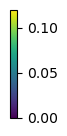

In [6]:
fig,ax = plt.subplots(figsize=(1.5,2))
plt.colorbar(im, ax=ax, shrink=0.7, aspect=15)
ax.remove()

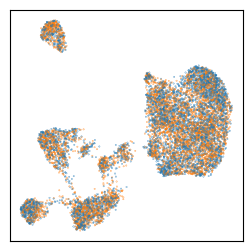

In [7]:
size = 0.05
umap = adata.obsm["X_umap"]
n_cells = umap.shape[0]
np.random.seed(1234)
order = np.arange(n_cells)
np.random.shuffle(order)

adata.obs["slice_color"] = ""
adata.obs["slice_color"][adata.obs["Bregma"] == -0.09] = "tab:blue"
adata.obs["slice_color"][adata.obs["Bregma"] == -0.04] = "tab:orange"

f = plt.figure(figsize=(3,3))

ax3 = f.add_subplot(1,1,1)
scatter2 = ax3.scatter(umap[order, 0], umap[order, 1], s=size, c=adata.obs["slice_color"][order], rasterized=True, marker='o')
ax3.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)

f.subplots_adjust(hspace=0.02, wspace=0.1)
plt.show()

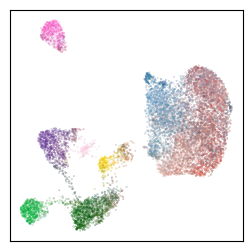

In [8]:
embedding = adata.obsm["X_umap"]
colors = ["#FD61D1", "#ffdd00", "#006400", "#fccde5", "#00BA38", "#6A3D9A",
          "#A50F15", "#DE2D26", "#FB6A4A", "#FC9272", "#FCBBA1",
          "#045a8d", "#2b8cbe", "#74a9cf", "#bdc9e1"]

size = .02
# umap, louvain
f = plt.figure(figsize=(3,3))
ax = f.add_subplot(1,1,1)
for i in range(len(colors)):
    ax.scatter(embedding[:, 0], embedding[:, 1], alpha = adata.obs["factor-"+str(i)],
               s=size, c=colors[i], label="cluster "+str(i), rasterized=True)
ax.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)

f.subplots_adjust(hspace=0.02, wspace=0.1)
plt.show()

### Visualize cell typing result

In [9]:
# load adata with aligned loc
adata_0 = sc.read_h5ad("examples/3d_MERFISH/adata_st_list_0_loc_aligned.h5ad")
adata_1 = sc.read_h5ad("examples/3d_MERFISH/adata_st_list_1_loc_aligned.h5ad")

In [10]:
adata_0.obs = adata[adata_0.obs.index, :].obs
adata_1.obs = adata[adata_1.obs.index, :].obs

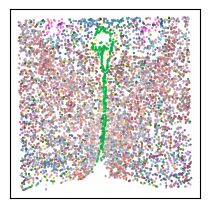

In [11]:
size = 0.3
f = plt.figure(figsize=(2.45, 2.45))

ax2 = f.add_subplot(1,1,1)
for i in range(len(colors)):
    ax2.scatter(adata_0.obsm["loc_aligned"][:, 0], adata_0.obsm["loc_aligned"][:, 1], alpha = adata_0.obs["factor-"+str(i)],
                s=size, c=colors[i], label="cluster "+str(i), rasterized=True)
ax2.axis('equal')
ax2.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)

f.subplots_adjust(hspace=0., wspace=0.)
plt.show()

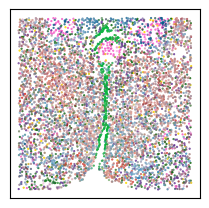

In [12]:
size = 0.3
f = plt.figure(figsize=(2.45, 2.45))

ax2 = f.add_subplot(1,1,1)
for i in range(len(colors)):
    ax2.scatter(adata_1.obsm["loc_aligned"][:, 0], adata_1.obsm["loc_aligned"][:, 1], alpha = adata_1.obs["factor-"+str(i)],
                s=size, c=colors[i], label="cluster "+str(i), rasterized=True)
ax2.axis('equal')
ax2.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)

f.subplots_adjust(hspace=0., wspace=0.)
plt.show()